As I first had a look over the project requests and datasets, I had the idea of doing a comparison between Boston and Atlanta. These are 2 places that I've never been, and don't know too much about it, so from a traveler standpoint, who doesn't care too much about special events, limited budget, but happy to visit new places, I have created this compared analysis. So, where are we going to go next - Boston or Seattle?

I am using the 2 datasets provided by Airbnb, but I am going to use only 2 out of the 3 tables.
So, init dataframes and have a lookat the data.
I must say from the start I am using Power BI on a daily basis pfor data analysis, being more friendly on the visual side, so I already checked the data structure and possibilies before starting this project.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
#F:/Cursuri/Udacity Data Scientist/Proiect 1 DS Udacity
Boston_path = "./Boston Airbnb Dataset/"
B_calendar = "boston calendar.csv"
B_listings = "Boston listings.csv"

df_B_calendar_unfiltered = pd.read_csv (Boston_path+B_calendar)
df_B_listings_unfiltered = pd.read_csv (Boston_path+B_listings)

Seattle_path = "./Seattle Airbnb Dataset/"
S_calendar = "seattle calendar.csv"
S_listings = "seattle listings.csv"

df_S_calendar_unfiltered = pd.read_csv (Seattle_path+S_calendar)
df_S_listings_unfiltered = pd.read_csv (Seattle_path+S_listings)

print(df_B_calendar_unfiltered.head())
#print(df_B_listings_unfiltered.head())
print(df_S_calendar_unfiltered.head())
#print(df_S_listings_unfiltered.head())

   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


Next, from the calendar tables, I will drop any lines that the price is missing (for the days a listing is not available). Cnsidering the sheer amount of data provided (hundreds of thousands of lines, dropping some rows will still provide a good accuracy of results). If you need further statistics about the dropped lines, please let me know.

In [33]:
df_B_calendar = df_B_calendar_unfiltered.dropna (subset="price",how="any")
df_S_calendar = df_S_calendar_unfiltered.dropna (subset="price",how="any")

print(df_B_calendar.head())
print(df_S_calendar.head())

     listing_id        date available   price
365     3075044  2017-08-22         t  $65.00
366     3075044  2017-08-21         t  $65.00
367     3075044  2017-08-20         t  $65.00
368     3075044  2017-08-19         t  $75.00
369     3075044  2017-08-18         t  $75.00
    listing_id        date available   price
0       241032  2016-01-04         t  $85.00
1       241032  2016-01-05         t  $85.00
9       241032  2016-01-13         t  $85.00
10      241032  2016-01-14         t  $85.00
14      241032  2016-01-18         t  $85.00


Next, I will add a new field for both calendars, in order to capture the location and printed a row and column count for both tables.

In [34]:
df_B_calendar.loc[:, ('location',)] = "Boston" 
df_S_calendar.loc[:, ('location',)] = "Seattle"

print(df_B_calendar.head())
print()

print("Boston calendar - Number of rows:", df_B_calendar.shape[0])
print("Boston calendar - Number of columns:", df_B_calendar.shape[1])
print("------------------------------------------------------------------")
print()

print(df_S_calendar.head())
print()

print("Seattle calendar - Number of rows:", df_S_calendar.shape[0])
print("Seattle calendar - Number of columns:", df_S_calendar.shape[1])
print("------------------------------------------------------------------")
print()

     listing_id        date available   price location
365     3075044  2017-08-22         t  $65.00   Boston
366     3075044  2017-08-21         t  $65.00   Boston
367     3075044  2017-08-20         t  $65.00   Boston
368     3075044  2017-08-19         t  $75.00   Boston
369     3075044  2017-08-18         t  $75.00   Boston

Boston calendar - Number of rows: 643037
Boston calendar - Number of columns: 5
------------------------------------------------------------------

    listing_id        date available   price location
0       241032  2016-01-04         t  $85.00  Seattle
1       241032  2016-01-05         t  $85.00  Seattle
9       241032  2016-01-13         t  $85.00  Seattle
10      241032  2016-01-14         t  $85.00  Seattle
14      241032  2016-01-18         t  $85.00  Seattle

Seattle calendar - Number of rows: 934542
Seattle calendar - Number of columns: 5
------------------------------------------------------------------



Next, I am going to create one big calendar and print statistics, to make sure everything is ok.

In [35]:
df_calendar = pd.concat([df_B_calendar,df_S_calendar], ignore_index=True)

print (df_calendar.head())
print()

print("All calendars - Number of rows:", df_calendar.shape[0])
print("All calendars - Number of columns:", df_calendar.shape[1])
print("------------------------------------------------------------------")
print()


   listing_id        date available   price location
0     3075044  2017-08-22         t  $65.00   Boston
1     3075044  2017-08-21         t  $65.00   Boston
2     3075044  2017-08-20         t  $65.00   Boston
3     3075044  2017-08-19         t  $75.00   Boston
4     3075044  2017-08-18         t  $75.00   Boston

All calendars - Number of rows: 1577579
All calendars - Number of columns: 5
------------------------------------------------------------------



Next I will transform the price sting in number type by removing the $ sign and "," and I am adding 3 column derived from the date field. I added weekday because I usually do in Power BI, but plotting visuals here is trickier, so I end up not using it

In [36]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

df_calendar['price'] = df_calendar['price'].str.strip("$")                         # remove the $ sign
#print(df_calendar['price'].dtype)

df_calendar['price'] = pd.to_numeric(df_calendar['price'].str.replace(",",""))     # remove the commas and convert to float

df_calendar ['weekday'] = df_calendar['date'].dt.day_name()                        # creating a column containin weekday name for each entry

df_calendar ['daynumber'] = df_calendar ['date'].dt.day_of_week + 1

df_calendar ['month'] = df_calendar ['date'].dt.month

print (df_calendar.head())
print("------------------------------------------------------------------")
print()

   listing_id       date available  price location   weekday  daynumber  month
0     3075044 2017-08-22         t   65.0   Boston   Tuesday          2      8
1     3075044 2017-08-21         t   65.0   Boston    Monday          1      8
2     3075044 2017-08-20         t   65.0   Boston    Sunday          7      8
3     3075044 2017-08-19         t   75.0   Boston  Saturday          6      8
4     3075044 2017-08-18         t   75.0   Boston    Friday          5      8
------------------------------------------------------------------



Next step will answer the first question: 1. What is the most expensive destination? As we can see it is Boston, 43% more expensive than Seattle. We can see both numbers or the bar chart.

In [37]:
mean_price = df_calendar.groupby (['location'])['price'].mean()

print(mean_price.head())

location
Boston     198.438909
Seattle    137.944859
Name: price, dtype: float64


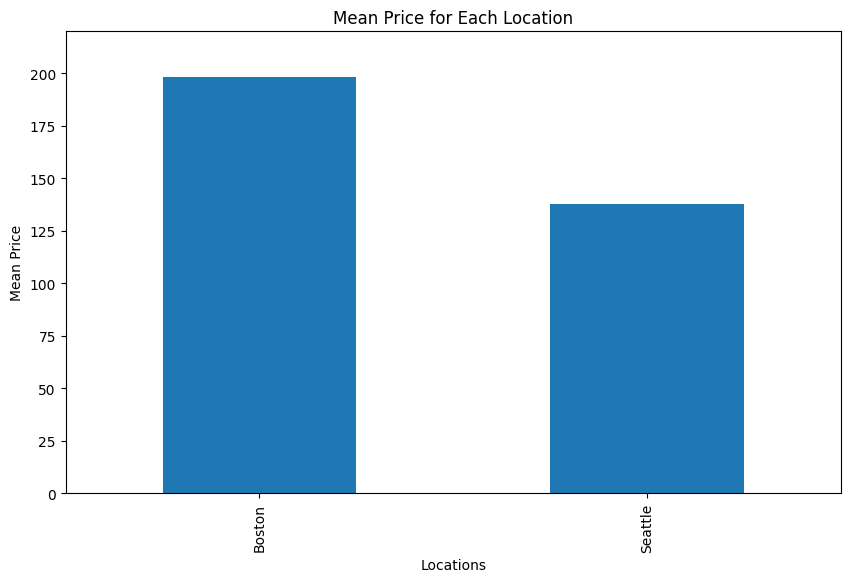

In [38]:
mean_price.plot(kind='bar', figsize=(10, 6))  # Adjust figure size as needed
plt.xlabel('Locations')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Location')
plt.ylim(0, 220)
plt.show()

Continuing the analysis, I make a new grouping to check now what are the cheapest and more expensive days for getting an accomodation through Airbnb on both locations. I have created a stacked bar plot for each daynumber for each location and for a better understanding of the variation, I have added 2 horizontal lines for both location with the Monday price. To emphasise the differences I have changed the y graph origin to 110 - I know it is not indicated to do this, but in this case I made an exception.

Now we can answer the second question: 2. There are any price differences for weekdays? Yes, but they aren't big. The trend is similar for both locations, considerind the reference point the Monday price, we notice a very slight decrease for Tuesday and Wednesday, and the prices will start to go up on Thursday, following with the biggest prices of the week on Friday and Saturday. On Sunday the prices start to go down. Allthough there is a trend up and down, the biggest price diffference is around 7-8%, so not so much (way less that I expected :) ).

location       Boston     Seattle
daynumber                        
1          195.809561  135.676414
2          195.173842  135.408764
3          195.418228  135.447880
4          198.073112  136.476032
5          203.121167  143.036294
6          203.408387  143.202136
7          198.219764  136.459941


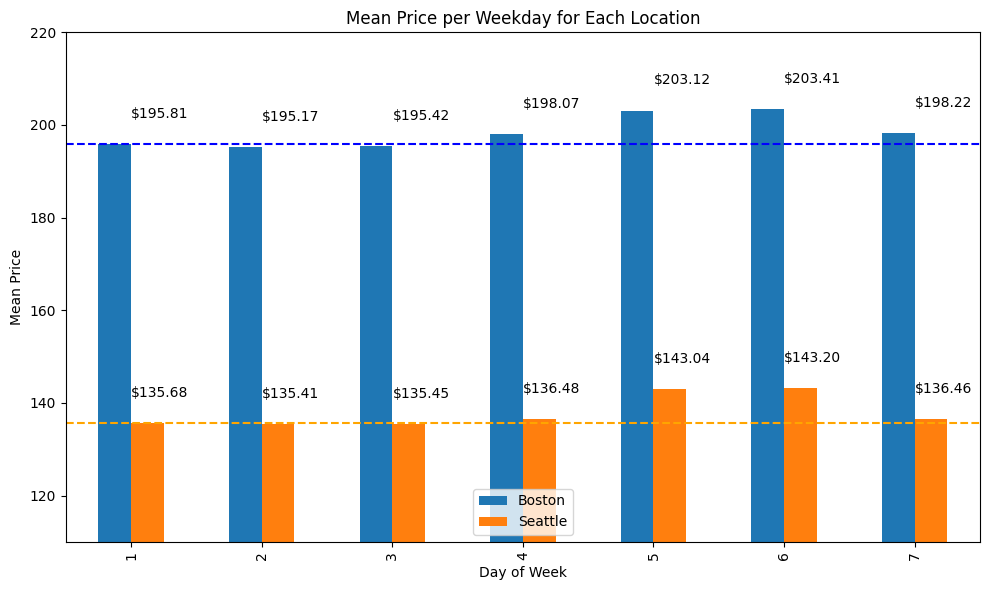

In [39]:
mean_price_per_weekday=df_calendar.groupby(['daynumber', 'location'])['price'].mean().unstack()

print(mean_price_per_weekday.head(7))

mean_price_per_weekday.plot(kind='bar', figsize=(10, 6)) 
plt.xlabel('Day of Week')
plt.ylabel('Mean Price')
plt.title('Mean Price per Weekday for Each Location')

for col in mean_price_per_weekday.columns:
  for idx, value in mean_price_per_weekday[col].items():
    plt.text(idx-0.78, value+5, '${:.2f}'.format(value), ha='center', va='bottom')  

plt.legend(loc='lower center')
plt.ylim(110, 220)
plt.axhline(y=135.68, color='orange', linestyle='--', label='Seattle price on Monday')
plt.axhline(y=195.81, color='blue', linestyle='--', label='Boston price on Monday')
plt.tight_layout()
plt.show()

Next, using the same df, I have done a different grouping, now to check if there is any Seasonality.

*** At this point, if I had some more data, I would use the ML to create a prediction for price, but the data covers only one year for each dataset, so not nearly enough. At my former job I used to make predictions about incoming volumes for data centers. Then I used linear regression and a moving average to create the forecasts. I need at least a few data points (8-10 weeks minimum) to be able to see the differences and run a forecast. If you need for me to do it anyway, please let me know. I tried to compensate by creating more analysis.

Using a different grouping, now we can see what happens with the average price for each location.

And we can answer question number 3. What are the best month to visit Seattle/Boston pricewise? January, February and March. I don't know how cold is in winter in Seattle or Boston, but the price difference is semquite notable. 
There is a particularity between these 2 locations, while in Boston September and October are the most expensive months, in Seattle, the top of the season is June, July and August.

location       Boston     Seattle
daynumber                        
1          195.809561  135.676414
2          195.173842  135.408764
3          195.418228  135.447880
4          198.073112  136.476032
5          203.121167  143.036294
6          203.408387  143.202136
7          198.219764  136.459941


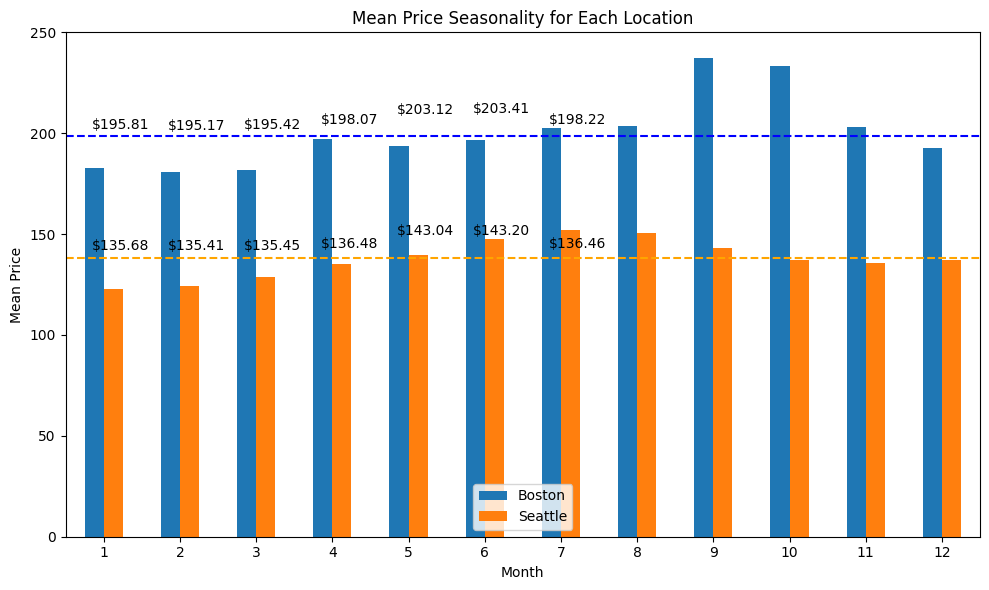

In [40]:
mean_price_per_month=df_calendar.groupby(['month', 'location'])['price'].mean().unstack()
df_temp1 = df_calendar[df_calendar['location']=='Boston']
Boston_mean_price = df_temp1['price'].mean()
df_temp2 = df_calendar[df_calendar['location']=='Seattle']
Seattle_mean_price = df_temp2['price'].mean()
print(mean_price_per_weekday.head(12))

mean_price_per_month.plot(kind='bar', figsize=(10, 6))  
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Mean Price Seasonality for Each Location')

for col in mean_price_per_month.columns:
  for idx, value in mean_price_per_weekday[col].items():
    plt.text(idx-0.78, value+5, '${:.2f}'.format(value), ha='center', va='bottom') 

plt.xticks(rotation=0)
plt.legend(loc='lower center')
plt.ylim(0, 250)
plt.axhline(y=Seattle_mean_price, color='orange', linestyle='--', label='Seattle mean price')
plt.axhline(y=Boston_mean_price, color='blue', linestyle='--', label='Boston mean price')
plt.tight_layout()
plt.show()

Next, I am going to do an amenities analysis, gathering data from both location, to find out what are the most common amenities and build a Top 10.

The data processing is similar with what I did previously regarding adding location and create one df out of the 2 dfs.

In [41]:
df_B_listings = df_B_listings_unfiltered [['id','amenities']]
df_B_listings.loc [:, ('location',)] = "Boston"
df_S_listings = df_S_listings_unfiltered [['id','amenities']]
df_S_listings.loc [:, ('location',)] = "Seattle"
df_listings = pd.concat([df_B_listings,df_S_listings], ignore_index=True)
print(df_listings.head())

         id                                          amenities location
0  12147973  {TV,"Wireless Internet",Kitchen,"Free Parking ...   Boston
1   3075044  {TV,Internet,"Wireless Internet","Air Conditio...   Boston
2      6976  {TV,"Cable TV","Wireless Internet","Air Condit...   Boston
3   1436513  {TV,Internet,"Wireless Internet","Air Conditio...   Boston
4   7651065  {Internet,"Wireless Internet","Air Conditionin...   Boston


Next, I have removed {} and "" to be able to split the string using "," as splitting point and calculate the apearance of each amenity and sort it ascending. The most popular amenity is "Wireless Internet". It beats "Heating" :)

In [42]:
df_listings['amenities'] = df_listings['amenities'].str.replace("{","")
df_listings['amenities'] = df_listings['amenities'].str.replace("}","")
df_listings['amenities'] = df_listings['amenities'].str.replace('"',"")
print(df_listings.head())

         id                                          amenities location
0  12147973  TV,Wireless Internet,Kitchen,Free Parking on P...   Boston
1   3075044  TV,Internet,Wireless Internet,Air Conditioning...   Boston
2      6976  TV,Cable TV,Wireless Internet,Air Conditioning...   Boston
3   1436513  TV,Internet,Wireless Internet,Air Conditioning...   Boston
4   7651065  Internet,Wireless Internet,Air Conditioning,Ki...   Boston


In [43]:
df_amenities = df_listings ['amenities'].str.split(',').explode()
amenities_count = df_amenities.value_counts()
most_popular = amenities_count.sort_values(ascending=False)

print('Top 10 most popular amenities found in Seattle and Boston Airbnb locations:')
print(most_popular.head(10))
print()
print("Total number of amnities found:", amenities_count.shape[0])

Top 10 most popular amenities found in Seattle and Boston Airbnb locations:
amenities
Wireless Internet    7088
Heating              7011
Kitchen              6707
Essentials           6231
Smoke Detector       6192
Dryer                5473
Washer               5467
Internet             5388
TV                   5181
Shampoo              5091
Name: count, dtype: int64

Total number of amnities found: 46


Next, I wanted to up the ante a little bit and see what are the price differences between room_types. For that, a left join will be needed.
Also, I wanted to take in consideration price for properties that have a rating higher than 80, because these properties are not under pressure of a lower rating, so price is normal, not lowered.
Therefore, I took both listings tables, added location column, filtered for ratings >80. then performed with the calendar (already filtered to have prices).
The grouping will follow, showing there is almost no difference between shared rooms and private room in Boston, while is seattle, the private room is more expensive. In both cases, Entire home/apt is the most expensive.

In [44]:
print(list(df_B_listings_unfiltered))
df_temp3 = df_B_listings_unfiltered[['id', 'review_scores_rating', 'property_type', 'room_type']]
df_temp4 = df_S_listings_unfiltered[['id', 'review_scores_rating', 'property_type', 'room_type']]
df_temp3.dropna (subset="review_scores_rating",how="any")

df_temp3.loc [:, ('location',)] = "Boston"
df_temp4.loc [:, ('location',)] = "Seattle"

df_temp5 = pd.concat([df_temp3.dropna (subset="review_scores_rating",how="any"),df_temp4.dropna (subset="review_scores_rating",how="any")], ignore_index=True)
df_ids_and_prices = df_temp5 [df_temp5['review_scores_rating']>80]
print(df_ids_and_prices.head(40))
print("------------------------------------------------------------------")
print()
print (df_calendar.head())
print("------------------------------------------------------------------")
print()

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [45]:
df_full_data = df_ids_and_prices.merge(df_calendar, how='left', left_on=['id','location'], right_on=['listing_id','location'])
print(df_full_data.head())
print("------------------------------------------------------------------")
print()

df_final_result = df_full_data.groupby(['location', 'room_type'])['price'].mean().unstack()
print(df_final_result.head())

        id  review_scores_rating property_type     room_type location  \
0  3075044                  94.0     Apartment  Private room   Boston   
1  3075044                  94.0     Apartment  Private room   Boston   
2  3075044                  94.0     Apartment  Private room   Boston   
3  3075044                  94.0     Apartment  Private room   Boston   
4  3075044                  94.0     Apartment  Private room   Boston   

   listing_id       date available  price   weekday  daynumber  month  
0   3075044.0 2017-08-22         t   65.0   Tuesday        2.0    8.0  
1   3075044.0 2017-08-21         t   65.0    Monday        1.0    8.0  
2   3075044.0 2017-08-20         t   65.0    Sunday        7.0    8.0  
3   3075044.0 2017-08-19         t   75.0  Saturday        6.0    8.0  
4   3075044.0 2017-08-18         t   75.0    Friday        5.0    8.0  
------------------------------------------------------------------

room_type  Entire home/apt  Private room  Shared room
locatio

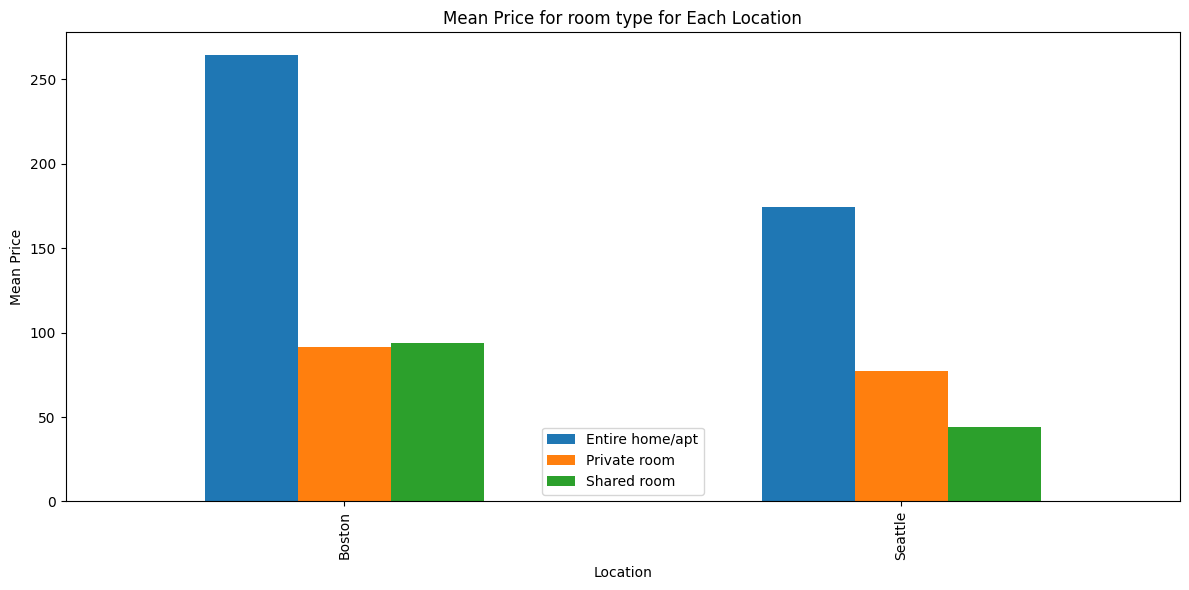

In [46]:
df_final_result.plot(kind='bar', figsize=(12, 6))  # Adjust figure size as needed
plt.xlabel('Location')
plt.ylabel('Mean Price')
plt.title('Mean Price for room type for Each Location')

plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Working over with these dataset has answered some questions, lot of questions will arise. But now, we all know a bit more about the Airbnb listings prices. But, the biggest question remains: What are you going to visit next: Boston or Seattle?